# Road Network Analysis: Catatumbo Region, Colombia

The Catatumbo is a strategic border region in northeastern Colombia, composed of the [the following municipalities](https://en.wikipedia.org/wiki/Catatumbo):

    Tibú, Ábrego, Convención, El Carmen, El Tarra, Hacarí, La Playa de Belén, Ocaña, Río de Oro, San Calixto, Sardinata, Teorama, González.

In 2025, Catatumbo remains one of Colombia’s most vulnerable zones. The region faces a dual crisis. On the one hand, escalating armed conflict has led to forced confinements and severe restrictions on civilian mobility. On the other, fragile transport infrastructure, dominated by unpaved secondary roads and exposed to intense rainfall, suffers frequent landslides that isolate entire rural communities from healthcare, food supplies, and emergency services.

In this setting, physical road connectivity is the primary lifeline for humanitarian access. The structure of the road network determines which communities can be reached, how quickly aid can be delivered, and how failures propagate across the region. This notebook focuses on the road system of the 13 Catatumbo municipalities and aims to:

1. Extract and simplify the OpenStreetMap (OSM) road network to obtain a tractable representation for spatial and network analysis.

2. Preserve connectivity and travel distance while reducing topological complexity through clustering-based graph simplification.

3. Identify critical edges whose removal or degradation would significantly reduce accessibility between supply points (source nodes) and affected communities (terminal nodes).

By combining network simplification with connectivity analysis, this notebook provides a practical framework for studying infrastructure vulnerability in Catatumbo, where even localized road disruptions can have region-wide humanitarian consequences.

In [1]:
# For constructing the transport network and simplify it
from src.graph_construction import build_graph, simplify_graph 

# For selecting the supply points (source nodes) and affected communities (terminal nodes)
from src.flow_network import get_sources_targets

# For plotting the final network
from src.plot import plot_graph

In [2]:
# Create the graph from a list of cities
cities = [
    'Tibú, Colombia', 'Ábrego, Colombia', 
    'Convención, Colombia', 'El Carmen, Colombia',
    'El Tarra, Colombia', 'Hacarí, Colombia',
    'La playa de Belén, Colombia', 'Ocaña, Colombia',
    'Río de Oro, Colombia', 'San Calixto, Colombia',
    'Sardinata, Colombia', 'Teorama, Colombia',
    'González, Colombia'
]
gdf, G = build_graph(cities)

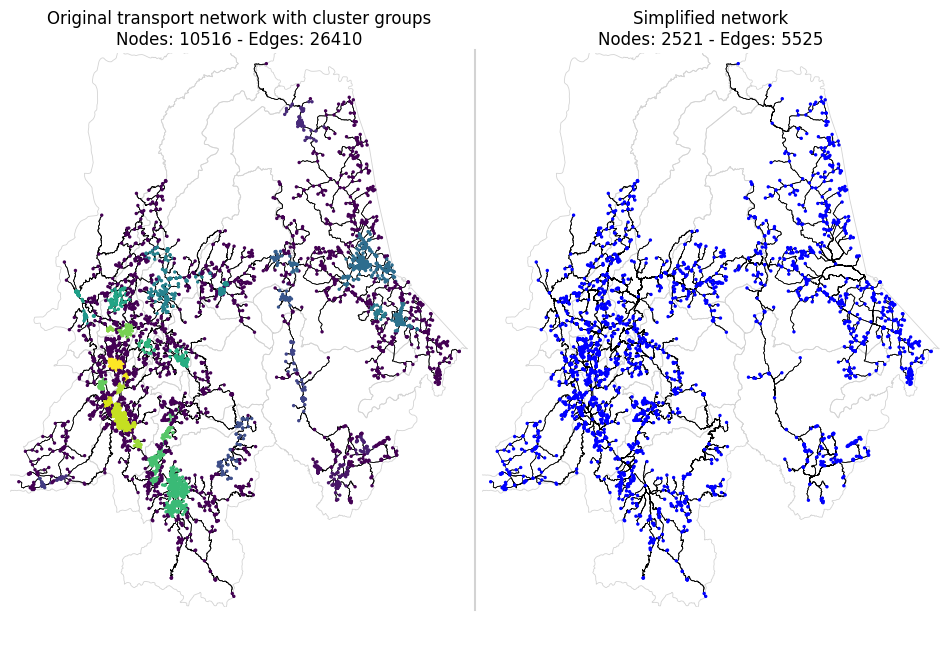

In [3]:
# Simplify the graph
G = simplify_graph(G, gdf, plot = True)

<Axes: title={'center': 'Catatumbo: simplified network with source and terminal nodes'}>

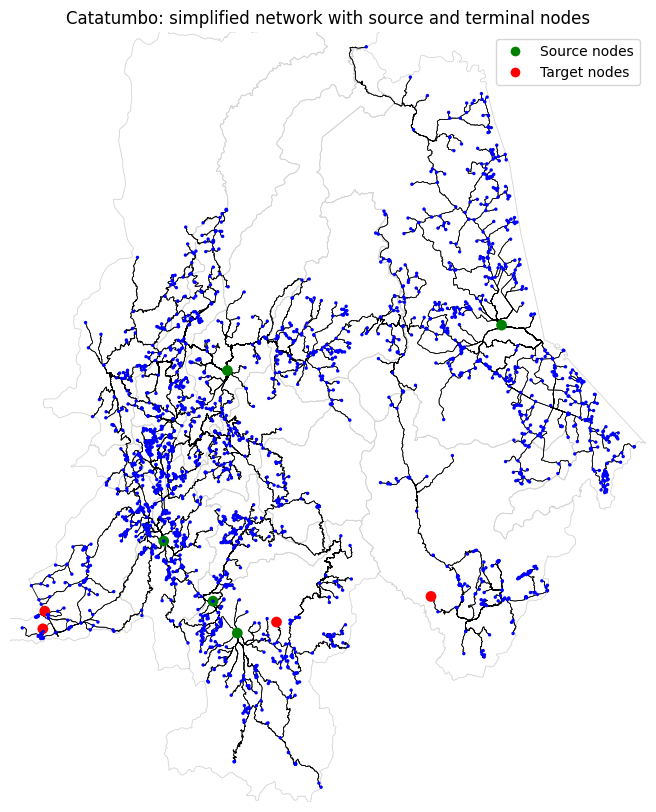

In [4]:
# Select 5 ources and 4 targets. 
# Sources are nodes with highest out-degree and target nodes are defined as the nodes with the lowest in-degree

source_target = get_sources_targets(G, n_sources=5, n_targets=4)
plot_graph(gdf, G, source_target = source_target, 
           title = "Catatumbo: simplified network with source and terminal nodes")